In [8]:
import csv
import matplotlib.pyplot as plt
from collections import Counter
import random
import seaborn as sns
import numpy as np

# ==== CONFIGURATION ====
NUM_ITEMS = 20000             # Number of items
NUM_AISLES = 20             # Number of aisles
SEED = 42                   # <-- Set your fixed seed here
OUTPUT_FILE = "warehouse_items.csv"

# Optional categories
categories = ['Electronics', 'Apparel', 'Books', 'Home', 'Tools', 'Toys', 'Groceries']

# ==== SET SEED ====
random.seed(SEED)

# ==== GENERATION ====
with open(OUTPUT_FILE, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ItemID", "ItemName", "Category", "Aisle"])

    for i in range(1, NUM_ITEMS + 1):
        item_id = f"ITEM{i:04d}"
        item_name = f"Product_{random.randint(1000, 9999)}"
        category = random.choice(categories)
        aisle = f"Aisle-{random.randint(1, NUM_AISLES)}"
        writer.writerow([item_id, item_name, category, aisle])

print(f"[Seed={SEED}] Generated {NUM_ITEMS} items across {NUM_AISLES} aisles in '{OUTPUT_FILE}'.")


[Seed=42] Generated 20000 items across 20 aisles in 'warehouse_items.csv'.


In [9]:
# ==== CONFIG ====
INPUT_FILE = "warehouse_items.csv"

# ==== READ CSV ====
items = []
categories = []
aisles = []

with open(INPUT_FILE, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        items.append(row['ItemID'])
        categories.append(row['Category'])
        aisles.append(row['Aisle'])

# ==== BASIC STATISTICS ====
total_items = len(items)
unique_items = len(set(items))
unique_categories = set(categories)
unique_aisles = set(aisles)

category_count = Counter(categories)
aisle_count = Counter(aisles)

most_common_category = category_count.most_common(1)[0]
least_common_category = category_count.most_common()[-1]

most_common_aisle = aisle_count.most_common(1)[0]
least_common_aisle = aisle_count.most_common()[-1]

# ==== PRINT SUMMARY ====
print("📦 Warehouse Item Statistics")
print("="*40)
print(f"Total items:              {total_items}")
print(f"Unique ItemIDs:           {unique_items}")
print(f"Number of Categories:     {len(unique_categories)}")
print(f"Categories:               {sorted(unique_categories)}")
print(f"Number of Aisles:         {len(unique_aisles)}")
print(f"Aisles:                   {sorted(unique_aisles)}")
print()
print(f"Most Common Category:     {most_common_category[0]} ({most_common_category[1]} items)")
print(f"Least Common Category:    {least_common_category[0]} ({least_common_category[1]} items)")
print(f"Most Populated Aisle:     {most_common_aisle[0]} ({most_common_aisle[1]} items)")
print(f"Least Populated Aisle:    {least_common_aisle[0]} ({least_common_aisle[1]} items)")


📦 Warehouse Item Statistics
Total items:              20000
Unique ItemIDs:           20000
Number of Categories:     7
Categories:               ['Apparel', 'Books', 'Electronics', 'Groceries', 'Home', 'Tools', 'Toys']
Number of Aisles:         20
Aisles:                   ['Aisle-1', 'Aisle-10', 'Aisle-11', 'Aisle-12', 'Aisle-13', 'Aisle-14', 'Aisle-15', 'Aisle-16', 'Aisle-17', 'Aisle-18', 'Aisle-19', 'Aisle-2', 'Aisle-20', 'Aisle-3', 'Aisle-4', 'Aisle-5', 'Aisle-6', 'Aisle-7', 'Aisle-8', 'Aisle-9']

Most Common Category:     Toys (2941 items)
Least Common Category:    Tools (2758 items)
Most Populated Aisle:     Aisle-9 (1045 items)
Least Populated Aisle:    Aisle-7 (920 items)


C:\Users\Patrick Kruidenberg\AppData\Local\Temp\ipykernel_1572\2602201913.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_count.keys()), y=list(category_count.values()), palette="viridis")


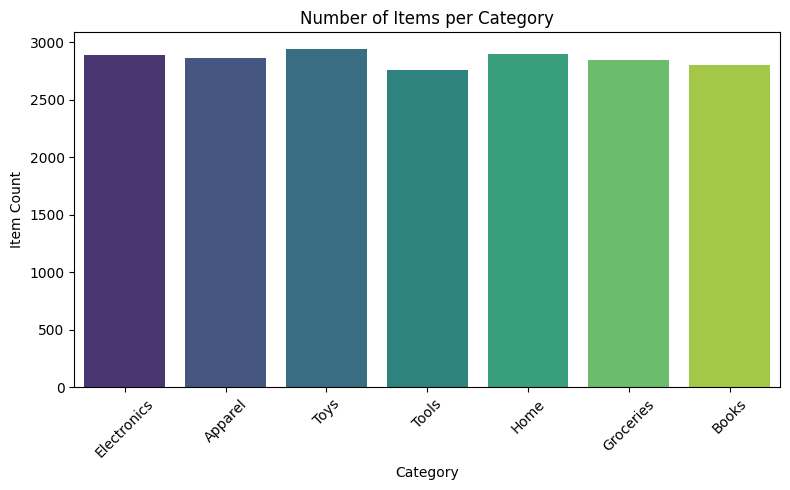

C:\Users\Patrick Kruidenberg\AppData\Local\Temp\ipykernel_1572\2602201913.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[a[0] for a in sorted_aisles], y=[a[1] for a in sorted_aisles], palette="mako")


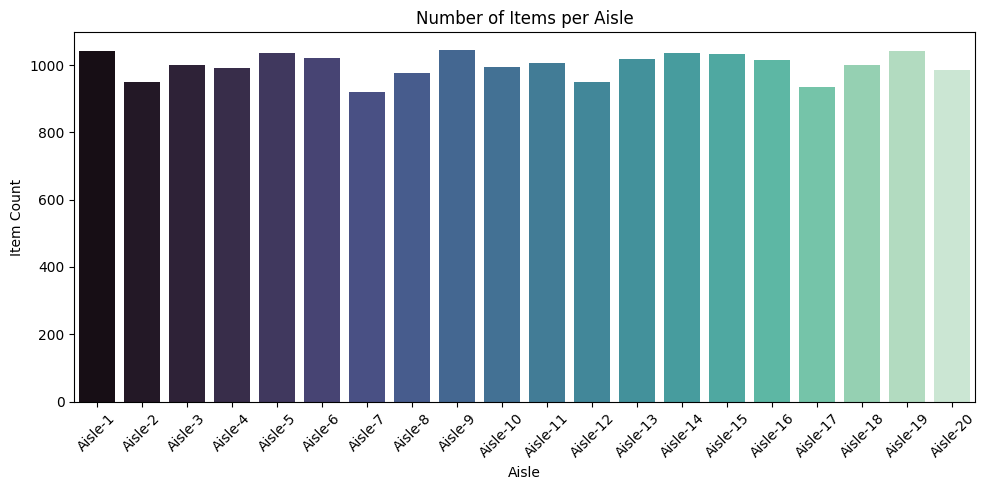

In [10]:
# ==== CONFIG ====
INPUT_FILE = "warehouse_items.csv"

# ==== READ CSV ====
items = []
categories = []
aisles = []

with open(INPUT_FILE, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        items.append(row['ItemID'])
        categories.append(row['Category'])
        aisles.append(row['Aisle'])

# ==== STATISTICS ====
total_items = len(items)
category_count = Counter(categories)
aisle_count = Counter(aisles)

# ==== PLOTS ====

## 1. Bar plot: Items per Category
plt.figure(figsize=(8, 5))
sns.barplot(x=list(category_count.keys()), y=list(category_count.values()), palette="viridis")
plt.title("Number of Items per Category")
plt.xlabel("Category")
plt.ylabel("Item Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Bar plot: Items per Aisle
plt.figure(figsize=(10, 5))
sorted_aisles = sorted(aisle_count.items(), key=lambda x: int(x[0].split("-")[1]))
sns.barplot(x=[a[0] for a in sorted_aisles], y=[a[1] for a in sorted_aisles], palette="mako")
plt.title("Number of Items per Aisle")
plt.xlabel("Aisle")
plt.ylabel("Item Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [11]:
# ==== CONFIG ====
SEED = 42
CSV_FILE = "warehouse_items.csv"
NUM_ORDERS = 100              # Number of orders to generate
EXP_LAMBDA = 1/5              # Mean inter-arrival time = 5 min
MEAN_ORDER_SIZE = 5           # Poisson mean

random.seed(SEED)
np.random.seed(SEED)

# ==== LOAD ITEM DATA ====
items = []
with open(CSV_FILE, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        items.append({
            'ItemID': row['ItemID'],
            'Aisle': row['Aisle'],
            'Category': row['Category'],
            'Name': row['ItemName']
        })

# ==== HELPER FUNCTION: Extract aisle number for sorting ====
def aisle_number(aisle_string):
    try:
        return int(aisle_string.split('-')[1])
    except:
        return float('inf')  # fallback if something is wrong

# ==== GENERATE ORDERS ====
orders = []

for order_id in range(1, NUM_ORDERS + 1):
    inter_arrival = np.random.exponential(scale=1/EXP_LAMBDA)
    order_size = np.random.poisson(MEAN_ORDER_SIZE)

    selected_items = random.sample(items, min(order_size, len(items)))

    # Sort items by aisle number
    selected_items.sort(key=lambda item: aisle_number(item['Aisle']))

    order = {
        'OrderID': f"ORDER{order_id:04d}",
        'InterArrivalTime': round(inter_arrival, 2),
        'Items': selected_items
    }
    orders.append(order)

# ==== PRINT SAMPLE ====
for order in orders[:10]:
    print(f"\n🧾 {order['OrderID']} - IAT: {order['InterArrivalTime']} min")
    for item in order['Items']:
        print(f"  ▸ {item['ItemID']} ({item['Name']}) in {item['Aisle']}")



🧾 ORDER0001 - IAT: 2.35 min
  ▸ ITEM3649 (Product_6944) in Aisle-9
  ▸ ITEM8025 (Product_2047) in Aisle-10
  ▸ ITEM9013 (Product_4831) in Aisle-18
  ▸ ITEM7315 (Product_8101) in Aisle-18
  ▸ ITEM0820 (Product_5833) in Aisle-20

🧾 ORDER0002 - IAT: 10.06 min
  ▸ ITEM2849 (Product_8506) in Aisle-1
  ▸ ITEM19350 (Product_4234) in Aisle-4
  ▸ ITEM4573 (Product_2897) in Aisle-15
  ▸ ITEM17871 (Product_5843) in Aisle-16
  ▸ ITEM3359 (Product_5485) in Aisle-18

🧾 ORDER0003 - IAT: 1.0 min
  ▸ ITEM0977 (Product_3777) in Aisle-9
  ▸ ITEM3071 (Product_5995) in Aisle-10
  ▸ ITEM13826 (Product_2734) in Aisle-15
  ▸ ITEM1042 (Product_2867) in Aisle-16

🧾 ORDER0004 - IAT: 4.73 min
  ▸ ITEM16560 (Product_2200) in Aisle-3
  ▸ ITEM7624 (Product_4266) in Aisle-8
  ▸ ITEM19727 (Product_7003) in Aisle-10
  ▸ ITEM7165 (Product_4973) in Aisle-12

🧾 ORDER0005 - IAT: 1.11 min
  ▸ ITEM18391 (Product_4624) in Aisle-3
  ▸ ITEM6516 (Product_2908) in Aisle-5
  ▸ ITEM0870 (Product_4621) in Aisle-10
  ▸ ITEM17857 (Pr